Importing all the required libraries

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Loading the dataset

In [2]:
country_population = pd.read_csv("country_population.csv")
fertility_rate = pd.read_csv("fertility_rate.csv")
life_expectancy = pd.read_csv("life_expectancy.csv")
Metadata_Country = pd.read_csv("Metadata_Country.csv")

Data Overview

In [3]:
country_population.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,"Population, total",SP.POP.TOTL,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [4]:
country_population.isnull().sum()

Country Name      0
Country Code      0
Indicator Name    0
Indicator Code    0
1960              4
                 ..
2012              2
2013              2
2014              2
2015              2
2016              2
Length: 61, dtype: int64

In [5]:
fertility_rate.isnull().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1960              28
                  ..
2012              16
2013              18
2014              18
2015              17
2016              18
Length: 61, dtype: int64

In [6]:
fertility_rate.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.763,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800
1,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,...,6.460,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635
2,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.478,7.524,7.563,7.592,7.611,7.619,...,6.368,6.307,6.238,6.162,6.082,6.000,5.920,5.841,5.766,5.694
3,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,...,1.668,1.650,1.646,1.653,1.668,1.685,1.700,1.710,1.714,1.713
4,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
country = country_population.drop(columns=["Indicator Name","Indicator Code"])

In [8]:
country

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,...,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0
260,"Yemen, Rep.",YEM,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,5748588.0,5858638.0,...,21751605.0,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0
261,South Africa,ZAF,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,20486439.0,21045785.0,...,49887181.0,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0
262,Zambia,ZMB,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,3676189.0,3791887.0,...,12725974.0,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0


In [9]:
country.duplicated().sum()

0

In [10]:
country[country["Country Name"]=="Not classified"].index

Index([108], dtype='int64')

In [11]:
country=country.drop([108])

In [12]:
country

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,...,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0
260,"Yemen, Rep.",YEM,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,5748588.0,5858638.0,...,21751605.0,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0
261,South Africa,ZAF,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,20486439.0,21045785.0,...,49887181.0,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0
262,Zambia,ZMB,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,3676189.0,3791887.0,...,12725974.0,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0


In [13]:
country[country["Country Name"]=="Not classified"].index

Index([], dtype='int64')

In [14]:
country.duplicated().sum()

0

In [15]:
country.isnull().sum()

Country Name    0
Country Code    0
1960            3
1961            3
1962            3
1963            3
1964            3
1965            3
1966            3
1967            3
1968            3
1969            3
1970            3
1971            3
1972            3
1973            3
1974            3
1975            3
1976            3
1977            3
1978            3
1979            3
1980            3
1981            3
1982            3
1983            3
1984            3
1985            3
1986            3
1987            3
1988            3
1989            3
1990            1
1991            1
1992            2
1993            2
1994            2
1995            1
1996            1
1997            1
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            1
2013      

In [16]:
country.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263 entries, 0 to 263
Data columns (total 59 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  263 non-null    object 
 1   Country Code  263 non-null    object 
 2   1960          260 non-null    float64
 3   1961          260 non-null    float64
 4   1962          260 non-null    float64
 5   1963          260 non-null    float64
 6   1964          260 non-null    float64
 7   1965          260 non-null    float64
 8   1966          260 non-null    float64
 9   1967          260 non-null    float64
 10  1968          260 non-null    float64
 11  1969          260 non-null    float64
 12  1970          260 non-null    float64
 13  1971          260 non-null    float64
 14  1972          260 non-null    float64
 15  1973          260 non-null    float64
 16  1974          260 non-null    float64
 17  1975          260 non-null    float64
 18  1976          260 non-null    float

In [17]:
# country[country.dtype=='float']
years = [str(year) for year in country.columns[2:]]

In [18]:
country[years]

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,...,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0
260,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,5748588.0,5858638.0,5971407.0,6083619.0,...,21751605.0,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0
261,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,20486439.0,21045785.0,21622590.0,22219897.0,...,49887181.0,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0
262,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,3676189.0,3791887.0,3912085.0,4038923.0,...,12725974.0,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0


In [19]:
for i in years:
    mean = country[i].mean()

In [20]:
mean

300980112.54198474

In [21]:
year = [str(i) for i in range(1960,2017)]
year

['1960',
 '1961',
 '1962',
 '1963',
 '1964',
 '1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016']

Replacing the null values in country year to mean values

In [22]:
for years in year:
    mean = country[years].mean()
    country[years].fillna(mean,inplace=True)

In [23]:
country.isnull().sum()

Country Name    0
Country Code    0
1960            0
1961            0
1962            0
1963            0
1964            0
1965            0
1966            0
1967            0
1968            0
1969            0
1970            0
1971            0
1972            0
1973            0
1974            0
1975            0
1976            0
1977            0
1978            0
1979            0
1980            0
1981            0
1982            0
1983            0
1984            0
1985            0
1986            0
1987            0
1988            0
1989            0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013      

In [24]:
country.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
1,Afghanistan,AFG,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
2,Angola,AGO,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
3,Albania,ALB,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
4,Andorra,AND,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,...,82683.0,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0


In [25]:
fertility_rate


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,4.820,4.655,4.471,4.271,4.059,3.842,...,1.763,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800
1,Afghanistan,AFG,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.450,7.450,7.450,7.450,7.450,7.450,...,6.460,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635
2,Angola,AGO,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.478,7.524,7.563,7.592,7.611,7.619,...,6.368,6.307,6.238,6.162,6.082,6.000,5.920,5.841,5.766,5.694
3,Albania,ALB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.489,6.401,6.282,6.133,5.960,5.773,...,1.668,1.650,1.646,1.653,1.668,1.685,1.700,1.710,1.714,1.713
4,Andorra,AND,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.430,2.380,2.340,2.290,2.240,2.190,2.160,2.130,2.090,2.060
260,"Yemen, Rep.",YEM,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.488,7.531,7.575,7.621,7.665,7.705,...,5.090,4.940,4.801,4.674,4.554,4.440,4.327,4.215,4.104,3.995
261,South Africa,ZAF,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,6.041,6.028,6.010,5.986,5.956,5.920,...,2.636,2.619,2.603,2.588,2.572,2.554,2.533,2.510,2.485,2.458
262,Zambia,ZMB,"Fertility rate, total (births per woman)",SP.DYN.TFRT.IN,7.115,7.169,7.214,7.249,7.274,7.291,...,5.642,5.561,5.478,5.397,5.318,5.242,5.171,5.104,5.041,4.981


In [26]:
fertility_rate.isnull().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1960              28
                  ..
2012              16
2013              18
2014              18
2015              17
2016              18
Length: 61, dtype: int64

In [27]:
fertility=fertility_rate.drop(columns=["Indicator Name","Indicator Code"])

In [28]:
fertility

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Aruba,ABW,4.820,4.655,4.471,4.271,4.059,3.842,3.625,3.417,...,1.763,1.764,1.769,1.776,1.783,1.791,1.796,1.800,1.801,1.800
1,Afghanistan,AFG,7.450,7.450,7.450,7.450,7.450,7.450,7.450,7.450,...,6.460,6.254,6.038,5.816,5.595,5.380,5.174,4.981,4.802,4.635
2,Angola,AGO,7.478,7.524,7.563,7.592,7.611,7.619,7.618,7.613,...,6.368,6.307,6.238,6.162,6.082,6.000,5.920,5.841,5.766,5.694
3,Albania,ALB,6.489,6.401,6.282,6.133,5.960,5.773,5.581,5.394,...,1.668,1.650,1.646,1.653,1.668,1.685,1.700,1.710,1.714,1.713
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.180,1.250,1.190,1.270,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.430,2.380,2.340,2.290,2.240,2.190,2.160,2.130,2.090,2.060
260,"Yemen, Rep.",YEM,7.488,7.531,7.575,7.621,7.665,7.705,7.737,7.760,...,5.090,4.940,4.801,4.674,4.554,4.440,4.327,4.215,4.104,3.995
261,South Africa,ZAF,6.041,6.028,6.010,5.986,5.956,5.920,5.878,5.832,...,2.636,2.619,2.603,2.588,2.572,2.554,2.533,2.510,2.485,2.458
262,Zambia,ZMB,7.115,7.169,7.214,7.249,7.274,7.291,7.304,7.317,...,5.642,5.561,5.478,5.397,5.318,5.242,5.171,5.104,5.041,4.981


extracting only the year columns

In [29]:
year = [str(year) for year in fertility.columns[2:]]

In [30]:
for years in year:
    mean_fert = fertility[years].mean()
    fertility[years].fillna(mean_fert,inplace=True)

In [31]:
fertility.isnull().sum()

Country Name    0
Country Code    0
1960            0
1961            0
1962            0
1963            0
1964            0
1965            0
1966            0
1967            0
1968            0
1969            0
1970            0
1971            0
1972            0
1973            0
1974            0
1975            0
1976            0
1977            0
1978            0
1979            0
1980            0
1981            0
1982            0
1983            0
1984            0
1985            0
1986            0
1987            0
1988            0
1989            0
1990            0
1991            0
1992            0
1993            0
1994            0
1995            0
1996            0
1997            0
1998            0
1999            0
2000            0
2001            0
2002            0
2003            0
2004            0
2005            0
2006            0
2007            0
2008            0
2009            0
2010            0
2011            0
2012            0
2013      

In [32]:
Metadata_Country.columns

Index(['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName',
       'Unnamed: 5'],
      dtype='object')

In [33]:
drop = ['IncomeGroup', 'SpecialNotes', 'TableName',
       'Unnamed: 5']
Metadata_Country.drop(columns=drop , inplace=True)

In [34]:
# country_population = pd.read_csv("country_population.csv")
# fertility_rate = pd.read_csv("fertility_rate.csv")
# life_expectancy = pd.read_csv("life_expectancy.csv")
# Metadata_Country = pd.read_csv("Metadata_Country.csv")

In [35]:
life_expectancy.isnull().sum()

Country Name       0
Country Code       0
Indicator Name     0
Indicator Code     0
1960              29
                  ..
2012              17
2013              19
2014              19
2015              20
2016              19
Length: 61, dtype: int64

In [36]:
expectancy = life_expectancy.drop(columns=["Indicator Name","Indicator Code"])

In [37]:
year = [str(i) for i in range(1960,2017)]
for years in year:
    mean = expectancy[years].mean()
    expectancy[years].fillna(mean,inplace=True)

In [38]:
expectancy.isnull().sum()
expectancy.duplicated().sum()

0

In country,fertility,expectancy and metadata datasets we dont have any missing values present.
Now we have dealed with the null values!

In [39]:
country.duplicated().sum()

0

In [40]:
fertility.duplicated().sum()

0

In [41]:
exp=pd.melt(expectancy,id_vars=["Country Name","Country Code"],var_name="Year",value_name="Life Expectancy")

In [42]:
exp.head()

,Country Name,Country Code,Year,Life Expectancy
0,Aruba,ABW,1960,65.662000
1,Afghanistan,AFG,1960,32.292000
2,Angola,AGO,1960,33.251000
3,Albania,ALB,1960,62.279000
4,Andorra,AND,1960,53.367005


In [43]:
fert=pd.melt(fertility,id_vars=["Country Name","Country Code"],var_name="Year",value_name="Fertility Rate")

In [44]:
fert.head()

,Country Name,Country Code,Year,Fertility Rate
0,Aruba,ABW,1960,4.820000
1,Afghanistan,AFG,1960,7.450000
2,Angola,AGO,1960,7.478000
3,Albania,ALB,1960,6.489000
4,Andorra,AND,1960,5.508217


In [45]:
country=pd.melt(country,id_vars=["Country Name","Country Code"],var_name="Year",value_name="Country Population")

In [46]:
country.head()

,Country Name,Country Code,Year,Country Population
0,Aruba,ABW,1960,54211.0
1,Afghanistan,AFG,1960,8996351.0
2,Angola,AGO,1960,5643182.0
3,Albania,ALB,1960,1608800.0
4,Andorra,AND,1960,13411.0


In [47]:
merged_data = pd.merge(country,exp,on=['Country Name', 'Country Code', 'Year'])

In [48]:
merged_data

,Country Name,Country Code,Year,Country Population,Life Expectancy
0,Aruba,ABW,1960,54211.0,65.662000
1,Afghanistan,AFG,1960,8996351.0,32.292000
2,Angola,AGO,1960,5643182.0,33.251000
3,Albania,ALB,1960,1608800.0,62.279000
4,Andorra,AND,1960,13411.0,53.367005
...,...,...,...,...,...
14986,Kosovo,XKX,2016,1816200.0,71.646341
14987,"Yemen, Rep.",YEM,2016,27584213.0,64.953000
14988,South Africa,ZAF,2016,56015473.0,62.774000
14989,Zambia,ZMB,2016,16591390.0,61.874000


In [49]:
merged_data = pd.merge(merged_data,fert,on=['Country Name', 'Country Code', 'Year'])

In [50]:
merged_data

,Country Name,Country Code,Year,Country Population,Life Expectancy,Fertility Rate
0,Aruba,ABW,1960,54211.0,65.662000,4.820000
1,Afghanistan,AFG,1960,8996351.0,32.292000,7.450000
2,Angola,AGO,1960,5643182.0,33.251000,7.478000
3,Albania,ALB,1960,1608800.0,62.279000,6.489000
4,Andorra,AND,1960,13411.0,53.367005,5.508217
...,...,...,...,...,...,...
14986,Kosovo,XKX,2016,1816200.0,71.646341,2.060000
14987,"Yemen, Rep.",YEM,2016,27584213.0,64.953000,3.995000
14988,South Africa,ZAF,2016,56015473.0,62.774000,2.458000
14989,Zambia,ZMB,2016,16591390.0,61.874000,4.981000


In [51]:
merged_data["Fertility Rate"]=merged_data["Fertility Rate"].round(decimals=1)
merged_data["Life Expectancy"]=merged_data["Life Expectancy"].round(decimals=1)

In [52]:
merged_data.head()

,Country Name,Country Code,Year,Country Population,Life Expectancy,Fertility Rate
0,Aruba,ABW,1960,54211.0,65.7,4.8
1,Afghanistan,AFG,1960,8996351.0,32.3,7.4
2,Angola,AGO,1960,5643182.0,33.3,7.5
3,Albania,ALB,1960,1608800.0,62.3,6.5
4,Andorra,AND,1960,13411.0,53.4,5.5


In [53]:
final_data=pd.merge(merged_data,Metadata_Country,on=['Country Code'])

In [54]:
final_data.to_csv("final_data.csv",index=False)

In [55]:
final_data[final_data["Country Code"]=="ABW"]

,Country Name,Country Code,Year,Country Population,Life Expectancy,Fertility Rate,Region
0,Aruba,ABW,1960,54211.0,65.7,4.8,Latin America & Caribbean
1,Aruba,ABW,1961,55438.0,66.1,4.7,Latin America & Caribbean
2,Aruba,ABW,1962,56225.0,66.4,4.5,Latin America & Caribbean
3,Aruba,ABW,1963,56695.0,66.8,4.3,Latin America & Caribbean
4,Aruba,ABW,1964,57032.0,67.1,4.1,Latin America & Caribbean
5,Aruba,ABW,1965,57360.0,67.4,3.8,Latin America & Caribbean
6,Aruba,ABW,1966,57715.0,67.8,3.6,Latin America & Caribbean
7,Aruba,ABW,1967,58055.0,68.1,3.4,Latin America & Caribbean
8,Aruba,ABW,1968,58386.0,68.4,3.2,Latin America & Caribbean
9,Aruba,ABW,1969,58726.0,68.8,3.1,Latin America & Caribbean


In [56]:
avg_rate = final_data.groupby("Region")["Fertility Rate"].mean().reset_index()

In [57]:
avg_rate = pd.DataFrame(avg_rate)
avg_rate 

,Region,Fertility Rate
0,East Asia & Pacific,3.896159
1,Europe & Central Asia,2.519026
2,Latin America & Caribbean,3.749165
3,Middle East & North Africa,4.807101
4,North America,2.586550
5,South Asia,4.973684
6,Sub-Saharan Africa,5.998026


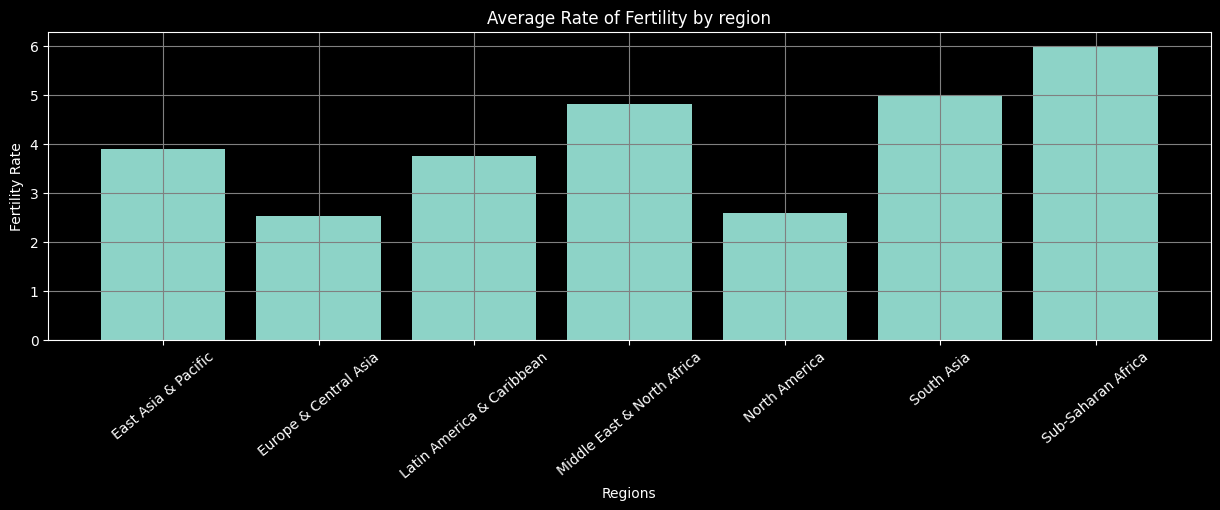

In [66]:
plt.figure(figsize=([15,4]))
plt.style.use("dark_background")
plt.bar(avg_rate['Region'],avg_rate["Fertility Rate"])
plt.title("Average Rate of Fertility by region")
plt.xlabel("Regions")
plt.ylabel("Fertility Rate")
plt.xticks(rotation=40)
plt.grid(True, color='gray')
plt.show()

Visualising life expectancy of different regions

In [68]:
life = final_data.groupby("Region")["Life Expectancy"].mean().reset_index()

In [69]:
life.head(2)

,Region,Life Expectancy
0,East Asia & Pacific,65.272072
1,Europe & Central Asia,70.684574


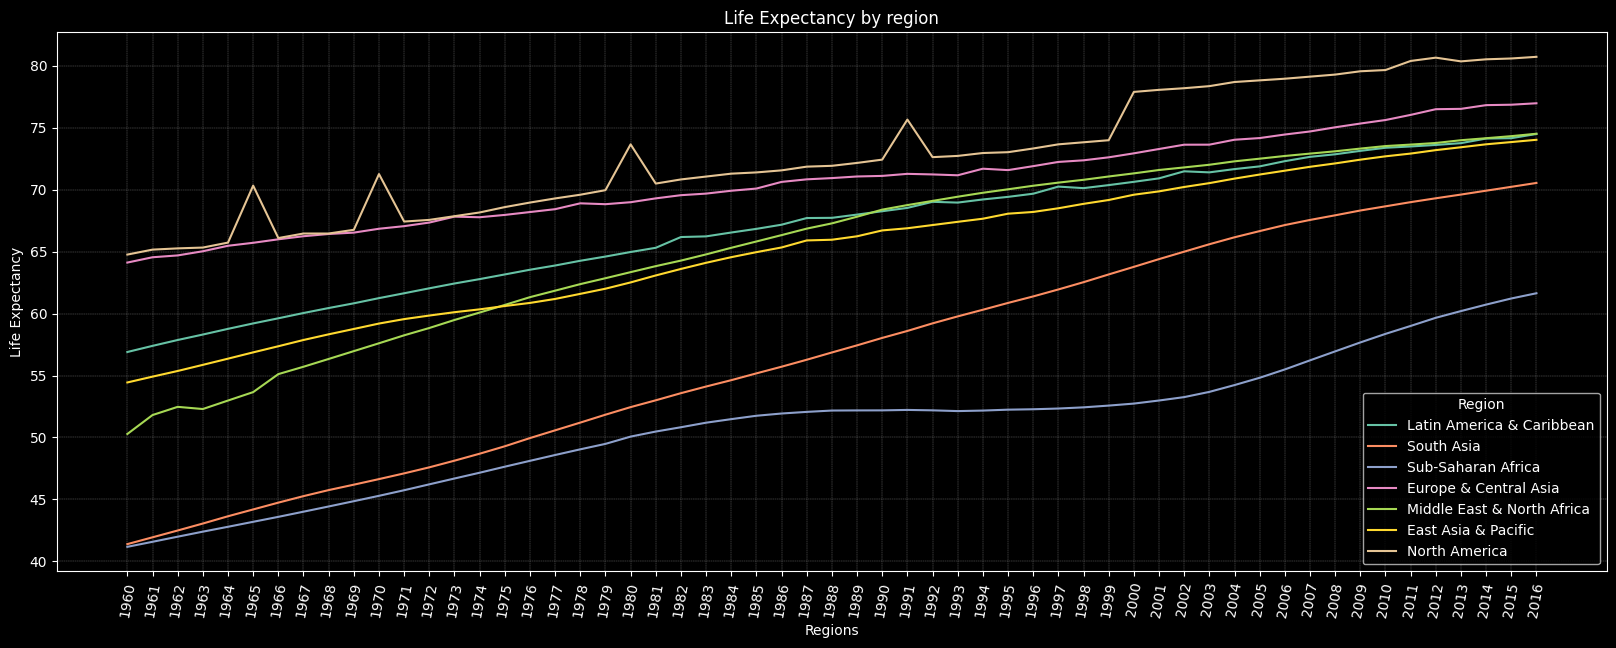

In [81]:
plt.figure(figsize=([20,7]))
plt.style.use("dark_background")
sns.lineplot(data=final_data, x='Year', y='Life Expectancy', hue='Region' ,  palette='Set2', errorbar=None)
plt.title("Life Expectancy by region")
plt.xlabel("Regions")
plt.ylabel("Life Expectancy")
plt.xticks(rotation=80)
plt.grid(True, color='gray',linestyle='--', linewidth=0.3)
plt.show()

In [84]:
final_data.columns[2:]

Index(['Year', 'Country Population', 'Life Expectancy', 'Fertility Rate',
       'Region'],
      dtype='object')

In [93]:
final_data["Year"]=final_data["Year"].astype('int')
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14991 entries, 0 to 14990
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country Name        14991 non-null  object 
 1   Country Code        14991 non-null  object 
 2   Year                14991 non-null  int32  
 3   Country Population  14991 non-null  float64
 4   Life Expectancy     14991 non-null  float64
 5   Fertility Rate      14991 non-null  float64
 6   Region              12369 non-null  object 
dtypes: float64(3), int32(1), object(3)
memory usage: 761.4+ KB


In [96]:
data1=final_data.select_dtypes(include=['float64', 'int32'])

In [97]:
data1.head()

,Year,Country Population,Life Expectancy,Fertility Rate
0,1960,54211.0,65.7,4.8
1,1961,55438.0,66.1,4.7
2,1962,56225.0,66.4,4.5
3,1963,56695.0,66.8,4.3
4,1964,57032.0,67.1,4.1


In [98]:
data1.corr()

,Year,Country Population,Life Expectancy,Fertility Rate
Year,1.000000,0.080798,0.480525,-0.480646
Country Population,0.080798,1.000000,0.028564,-0.092954
Life Expectancy,0.480525,0.028564,1.000000,-0.862673
Fertility Rate,-0.480646,-0.092954,-0.862673,1.000000


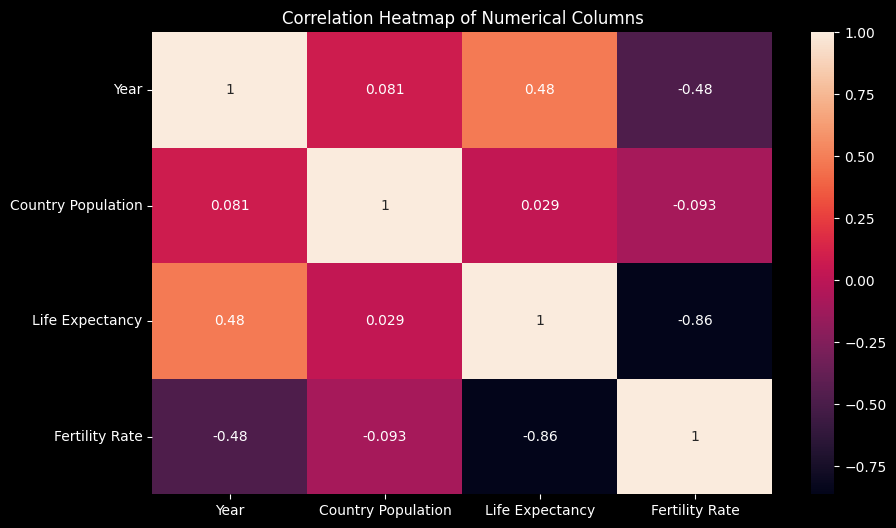

In [100]:
plt.figure(figsize=(10,6))
sns.heatmap(data1.corr(numeric_only=True),annot=True)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

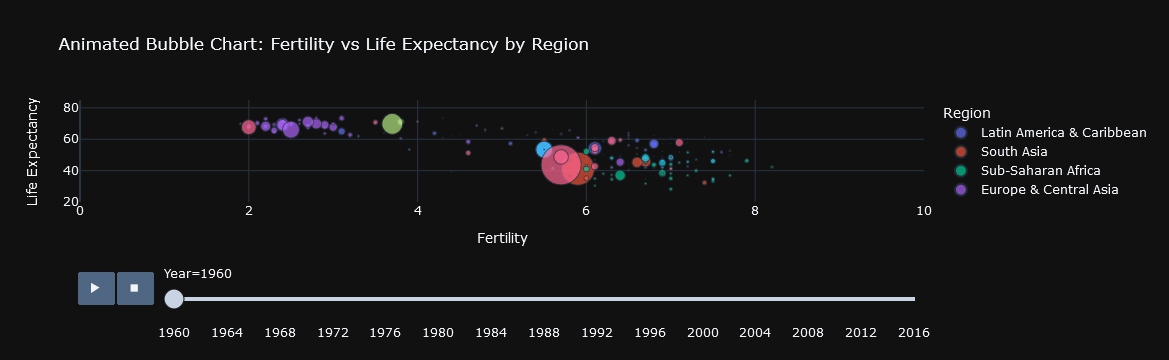

In [107]:
fig = px.scatter(final_data,
                 x='Fertility Rate',
                 y='Life Expectancy',
                 size='Country Population',
                 color='Region',
                 hover_name='Country Code',
                 animation_frame='Year',
                 animation_group='Country Code',
                 template='plotly_dark',
                 size_max=95,
                 range_x=[0, 10],
                 range_y=[20, 85],
                 title='Animated Bubble Chart: Fertility vs Life Expectancy by Region',
                 labels={'Fertility': 'Fertility', 'Life Expectancy': 'Life Expectancy', 'Population': 'Population', 'Region': 'Region', 'Country Code': 'Country Code'})

fig.update_layout(
    xaxis_title='Fertility',
    yaxis_title='Life Expectancy',
    legend_title='Region',
    hoverlabel=dict(
        bgcolor='white',
        font_size=12,
        font_family='Arial, sans-serif'))

fig.show()

This animated bubble chart visualizes the dynamic relationship between Fertility Rate and Life Expectancy across countries, grouped by regions. Each bubble represents a country, with size indicating its population. As the years progress, observe how changes in fertility and life expectancy unfold, providing insights into global demographic trends.